<a href="https://colab.research.google.com/github/Sharath2424/Data-Science-projects/blob/main/TATA_Motors_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependancies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

Load dataset

In [2]:
from google.colab import files
files.upload()

Saving TATAMOTORS_BSE_01Oct20-01Oct21.csv to TATAMOTORS_BSE_01Oct20-01Oct21.csv


{'TATAMOTORS_BSE_01Oct20-01Oct21.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311\n2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303\n2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922\n2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654\n2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175\n2020-10-09,141.399994,142.649994,138.000000,138.449997,138.449997,1423879\n2020-10-12,139.550003,139.850006,133.050003,135.850006,135.850006,2787824\n2020-10-13,135.550003,137.100006,132.850006,134.100006,134.100006,1370296\n2020-10-14,134.000000,134.600006,128.800003,130.699997,130.699997,1752029\n2020-10-15,131.899994,134.350006,126.500000,127.000000,127.000000,3983711\n2020-10-16,129.800003,130.000000,126.000000,127.699997,127.699997,3339831\n2020-10-19,130.699997,130.699997,127.849998,128.250000,128.250000,1667032\n2020-10-20,128.

In [3]:
df= pd.read_csv('TATAMOTORS_BSE_01Oct20-01Oct21.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0
1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0
2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0
3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0
4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0


In [10]:
df.shape

(248, 8)

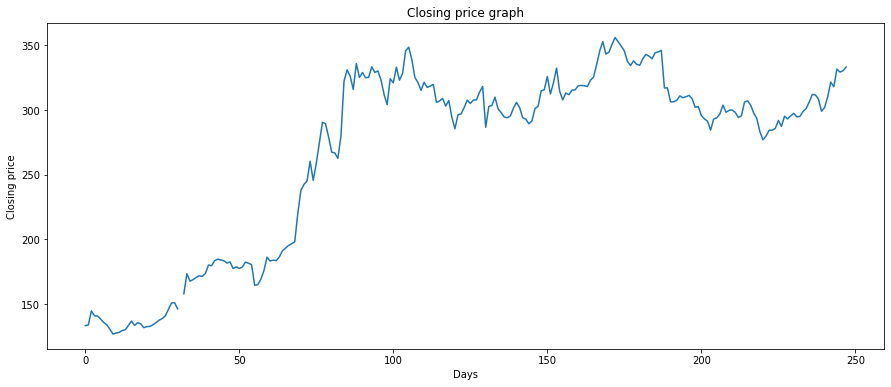

In [12]:
#Visualise close price data.
plt.figure(figsize= (15,6))
plt.title("Closing price graph")
plt.xlabel("Days")
plt.ylabel("Closing price")
plt.plot(df['Close'])
plt.show()

In [14]:
#Get the closing price.
df= df[['Close']]
df.head()

,Close
0,133.500000
1,133.899994
2,144.850006
3,141.000000
4,140.899994


In [16]:
#Create a variable to predict 'x' days out into future.
future_days= 25

#Create a new column(target) shifted 'x' units/days up.
df['Prediction']= df[['Close']].shift(-future_days)
df.head()

,Close,Prediction
0,133.500000,138.899994
1,133.899994,141.000000
2,144.850006,146.000000
3,141.000000,150.949997
4,140.899994,151.149994


In [17]:
df.tail()

,Close,Prediction
243,317.950012,NaN
244,331.549988,NaN
245,329.250000,NaN
246,330.350006,NaN
247,333.200012,NaN


In [26]:
df= df.dropna()

In [27]:
#Create the feature dataset (x) and convert it to a numpy array and remove 'x' rows/days.
x= np.array(df.drop(['Prediction'], 1))[: -future_days]
print(x)

[[133.5     ]
 [133.899994]
 [144.850006]
 [141.      ]
 [140.899994]
 [138.449997]
 [134.100006]
 [130.699997]
 [127.      ]
 [127.699997]
 [128.25    ]
 [129.649994]
 [130.25    ]
 [133.449997]
 [137.      ]
 [133.649994]
 [135.699997]
 [134.800003]
 [131.899994]
 [132.699997]
 [132.850006]
 [134.100006]
 [135.850006]
 [137.649994]
 [138.899994]
 [141.      ]
 [146.      ]
 [150.949997]
 [151.149994]
 [146.350006]
 [158.      ]
 [173.550003]
 [167.75    ]
 [169.      ]
 [170.600006]
 [172.      ]
 [171.399994]
 [173.75    ]
 [180.25    ]
 [179.699997]
 [183.550003]
 [184.800003]
 [184.149994]
 [183.550003]
 [181.75    ]
 [182.699997]
 [177.600006]
 [178.800003]
 [177.600006]
 [178.800003]
 [182.5     ]
 [181.649994]
 [180.5     ]
 [164.550003]
 [165.050003]
 [169.199997]
 [175.899994]
 [186.300003]
 [183.399994]
 [184.      ]
 [183.699997]
 [186.449997]
 [191.199997]
 [193.25    ]
 [195.350006]
 [196.699997]
 [198.100006]
 [220.100006]
 [237.800003]
 [242.5     ]
 [245.149994]
 [260.

In [28]:
#Create the target dataset (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days.
y= np.array(df['Prediction'])[:-future_days]
print(y)

[138.899994 141.       146.       150.949997 151.149994 146.350006
 158.       173.550003 167.75     169.       170.600006 172.
 171.399994 173.75     180.25     179.699997 183.550003 184.800003
 184.149994 183.550003 181.75     182.699997 177.600006 178.800003
 177.600006 178.800003 182.5      181.649994 180.5      164.550003
 169.199997 175.899994 186.300003 183.399994 184.       183.699997
 186.449997 191.199997 193.25     195.350006 196.699997 198.100006
 220.100006 237.800003 242.5      245.149994 260.399994 245.649994
 258.850006 274.899994 290.450012 289.399994 279.049988 267.399994
 266.850006 262.600006 279.75     322.299988 330.950012 326.100006
 315.899994 335.850006 325.100006 328.950012 324.899994 325.25
 333.299988 329.049988 330.100006 323.299988 312.       304.149994
 324.100006 320.950012 333.100006 323.       328.100006 345.700012
 348.5      339.200012 325.100006 321.25     315.200012 321.350006
 317.450012 318.450012 319.75     305.850006 306.899994 308.950012
 303.

In [29]:
#Slpit the data into 70% training and 30% testing.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)

Model building

In [30]:
#Linear regression model.
lr= LinearRegression().fit(x_train, y_train)

#Decision Tree model.
dt= DecisionTreeRegressor().fit(x_train, y_train)

#Random forest model.
rf= RandomForestRegressor().fit(x_train, y_train)

In [31]:
#Get the last 'x' rows from the feature dataset.
x_future= df.drop(['Prediction'], 1)[: -future_days]
x_future= x_future.tail(future_days)
x_future= np.array(x_future)
print(x_future)

[[352.649994]
 [349.299988]
 [345.600006]
 [337.549988]
 [334.350006]
 [337.950012]
 [335.25    ]
 [334.549988]
 [339.549988]
 [342.899994]
 [341.549988]
 [339.549988]
 [344.200012]
 [344.850006]
 [346.049988]
 [316.950012]
 [317.049988]
 [306.299988]
 [306.350006]
 [307.450012]
 [310.899994]
 [309.450012]
 [310.200012]
 [311.25    ]
 [308.700012]]


In [32]:
#Show the Linear model prediction.
lr_prediction= lr.predict(x_future)
print(lr_prediction)
print()


#Show the Decision tree model prediction.
dt_prediction= dt.predict(x_future)
print(dt_prediction)
print()

#Show the Random forest model prediction.
rf_prediction= rf.predict(x_future)
print(rf_prediction)
print()

[339.7710522  337.64749305 335.30208512 330.1992019  328.17074252
 330.45277596 328.74124613 328.29751054 331.46699613 333.59055529
 332.73479037 331.46699613 334.41463295 334.82666228 335.58732741
 317.14093645 317.20431095 310.38991692 310.42162319 311.11891382
 313.30584747 312.38670806 312.8621309  313.52771527 311.91128522]

[310.899994 302.600006 307.450012 284.450012 291.299988 284.450012
 293.       291.299988 298.25     303.75     298.200012 298.25
 298.149994 298.149994 294.25     295.450012 306.049988 307.100006
 303.75     297.649994 293.350006 283.200012 293.350006 279.850006
 284.350006]

[308.99299748 304.25700372 307.94800618 292.75925858 295.64649274
 289.51492509 298.87900144 295.64649274 297.15655107 302.64550258
 300.29632307 297.15655107 301.27099856 301.60799838 303.2599997
 298.60550468 302.919994   306.9475048  305.40650204 302.89849526
 293.69700522 288.55350996 290.22600696 288.26900504 290.76550618]



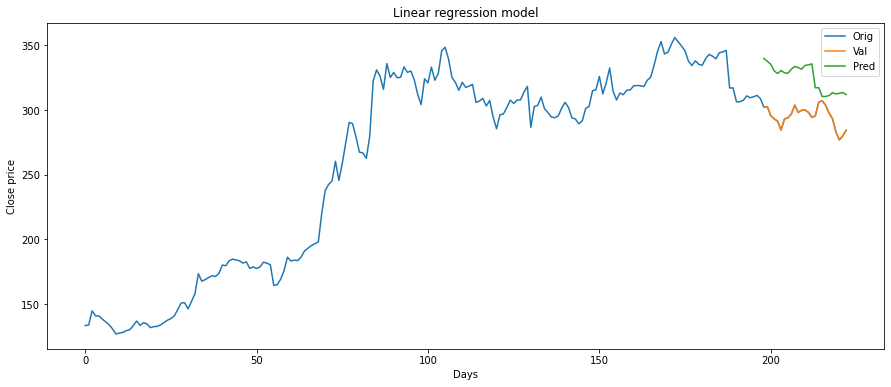

In [34]:
#Visualize linear regression model.
predictions= lr_prediction

valid= df[x.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(15,6))
plt.title('Linear regression model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

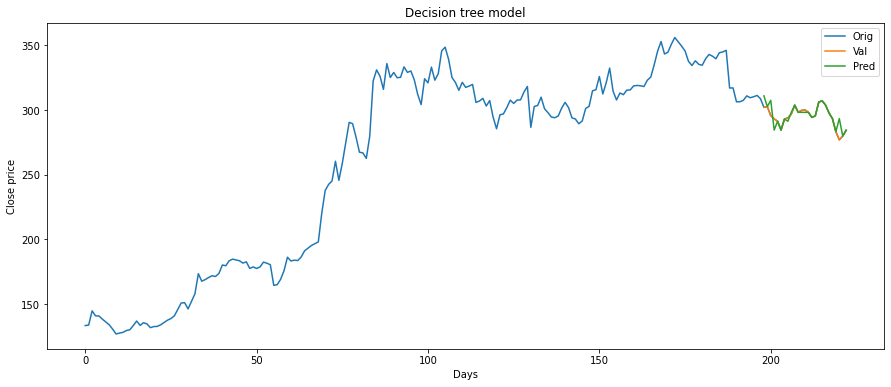

In [35]:
#Visualize decision tree model.
predictions= dt_prediction

valid= df[x.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(15,6))
plt.title('Decision tree model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

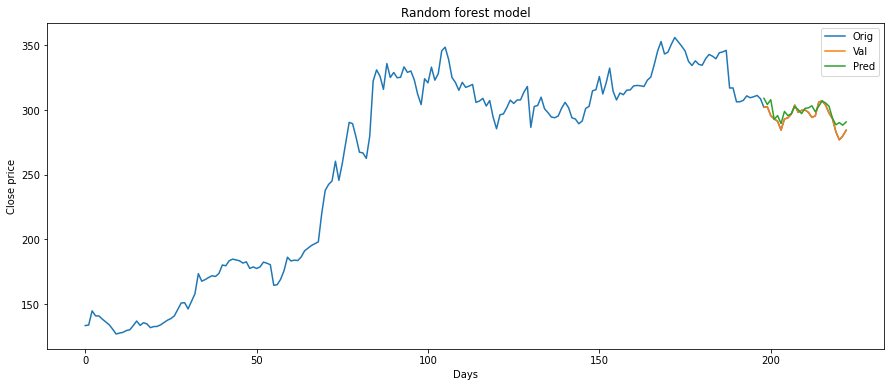

In [36]:
#Visualize random forest model.
predictions= rf_prediction

valid= df[x.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(15,6))
plt.title('Random forest model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

Conclusion:

Both decision tree & random forest models are predicting the closing price predominently.